# GK9102 Data Science "Probabilistische Modellierung" (POSA)

Andreas Sünder - 21.12.2023

## The Bayesian Way

### Grundlagen

Bayesian Inference
* Definition: updating one's beliefs about a hypothesis as new information becomes available.
* is statistically correct even with little data

Darstellen von Wahrscheinlichkeiten in Python:

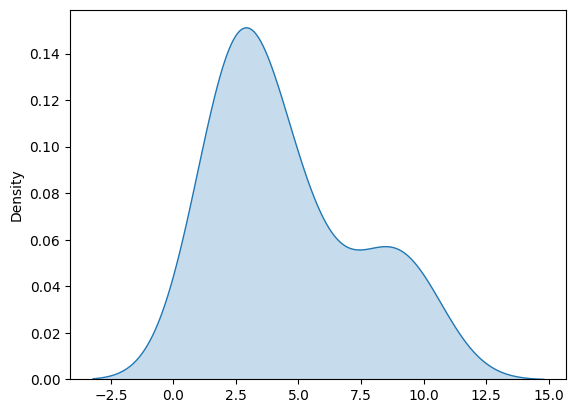

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste der Ziehungen
draws = [4.8965301775481835, 2.7773683448746667, 10.09075099583615, 2.248355277758697, 4.97445385956666, 2.8525720557785617, 1.9606485835258463, 9.094001197650389, 2.899645995467589, 8.161014208247678, 1.503981043342368, 6.309643538930294, 8.819082426904082, 1.472813045574119, 3.3109342512394484, 4.160426132108971, 2.6415037488618496, 3.1823911047498967]

# Darstellen als Plot
sns.kdeplot(draws, fill=True)
plt.show()

Binomialverteilung:
* diskrete Verteilung, die nur zwei Werte annehmen kann (z.B. 0 oder 1)

In Python:

In [6]:
import numpy as np

# Ziehungen simulieren
np.random.binomial(
  100,  # Anzahl der Versuche
  0.5   # Wahrscheinlichkeit für Erfolg  
)

54

Auch kann mit dieser Funktion die Draws direkt erhalten:

In [7]:
np.random.binomial(
  1,      # Anzahl der Versuche auf 1 setzen
  0.5,
  size=5  # Anzahl der Versuche hier angeben
)

array([0, 0, 1, 1, 1])

## Bayesian estimation

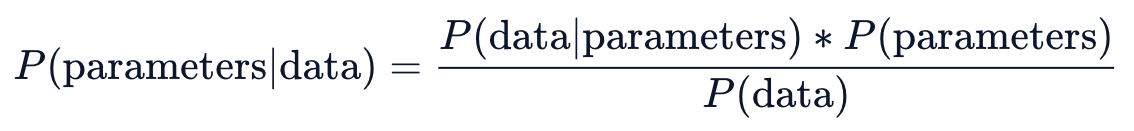

### Beispiel

Beispiel:

*You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the percentage of patients cured by the drug. An experiment was quickly set up in which 10 sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.*

In [2]:
import numpy as np
import pandas as pd

# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0, 11)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0.0, 1.01, 0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ["num_patients_cured", "efficacy_rate"]

# Print df
print(df)

      num_patients_cured  efficacy_rate
0                      0           0.00
1                      0           0.01
2                      0           0.02
3                      0           0.03
4                      0           0.04
...                  ...            ...
1106                  10           0.96
1107                  10           0.97
1108                  10           0.98
1109                  10           0.99
1110                  10           1.00

[1111 rows x 2 columns]


*According to the experiment's outcomes, out of 10 sick patients treated with the drug, 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? Assume you have no prior knowledge whatsoever regarding how good the drug is.*

/var/folders/mx/px22c6tj3rz__gl1g635_wsm0000gn/T/ipykernel_48165/755895169.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()


<Axes: xlabel='efficacy_rate', ylabel='posterior_prob'>

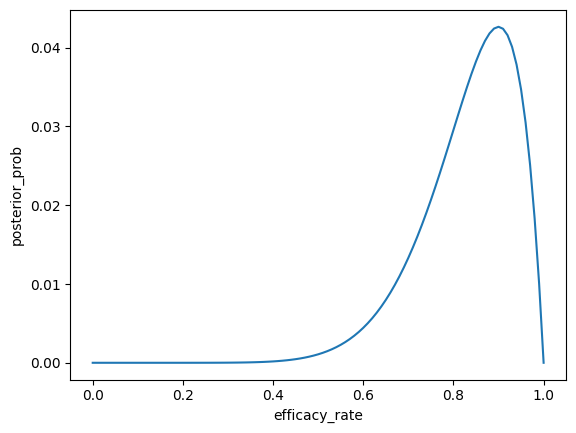

In [11]:
from scipy.stats import binom, uniform
import seaborn as sns

# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])

# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()

# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

# Plot the drug's posterior efficacy rate
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], y=df_9_of_10_cured["posterior_prob"])

*Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data! This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!*

/var/folders/mx/px22c6tj3rz__gl1g635_wsm0000gn/T/ipykernel_48165/3498830042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()


<Axes: xlabel='efficacy_rate', ylabel='new_posterior_prob'>

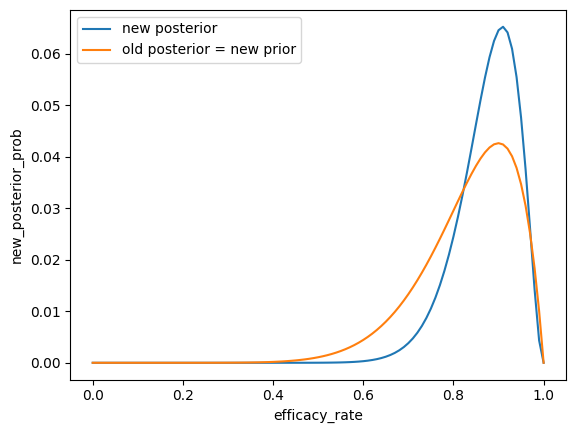

In [16]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()

# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df["num_patients_cured"] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()

# Plot the new drug's posterior efficacy rate upon the old one
sns.lineplot(x=df_10_of_12_cured["efficacy_rate"], 
             y=df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], 
             y=df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")

### Prior distributions

In der Praxis können die berechneten Posterior-Distributionen als Prior-Distributionen für weitere Berechnungen verwendet werden. Des Weiteren hat sich gezeigt, dass gewisse Prior-Distributions eine sogenannte "Conjugate Prior" sind. Dies bedeutet, dass die Posterior-Distribution die gleiche Form hat wie die Prior-Distribution. Im Beispiel von vorhin kann die Beta-Verteilung als Prior-Distribution verwendet werden. Die Beta-Verteilung ist eine Conjugate Prior für die Binomial-Verteilung, womit sich die Posterior-Distribution "simulieren" lässt:

<Axes: ylabel='Density'>

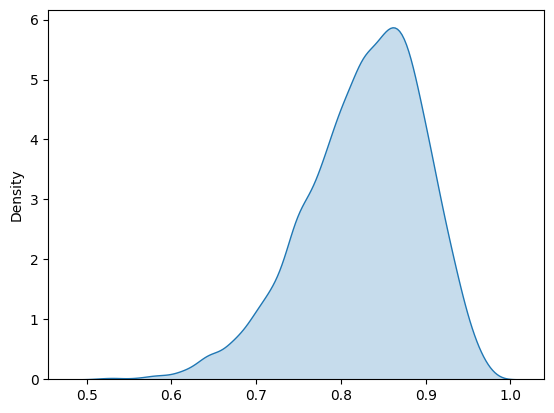

In [19]:
# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, fill=True)

### Point estimates

Machen wir weiter:

In [24]:
drug_efficacy_posterior_draws = posterior_draws

# Calculate the expected number of people cured
cured_expected = np.mean(drug_efficacy_posterior_draws) * 100_000

# Calculate the minimum number of people cured with 50% probability
min_cured_50_perc = np.percentile(drug_efficacy_posterior_draws, 50) * 100_000

# Calculate the minimum number of people cured with 90% probability
min_cured_90_perc = np.percentile(drug_efficacy_posterior_draws, 10) * 100_000

# Print the filled-in memo
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")

Based on the experiments carried out by ourselves and neighboring countries, 
should we distribute the drug, we can expect 82691 infected people to be cured. 
There is a 50% probability the number of cured infections 
will amount to at least 83483, and with 90% probability 
it will not be less than 73343.


In [25]:
# Import arviz as az
import arviz as az

# Calculate HPD credible interval of 90%
ci_90 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.9)

# Calculate HPD credible interval of 95%
ci_95 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.95)

# Print the memo
print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")

The experimental results indicate that with a 90% probability 
the new drug's efficacy rate is between 0.72 and 0.94, 
and with a 95% probability it is between 0.69 and 0.95.


## Bayesian inference

## Bayesian linear regression with pyMC3